In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def get_barplot(data, xname="model", height="accuracy", subplots=(1, 1), style=None, figsize=(15, 10), title="", save=False, ext="png", ymin=0.0, ymax=1.0, show=True):
    if style is None:
        style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }
    
    fig, ax = plt.subplots(*subplots, figsize=figsize, layout="tight")
    ax.bar(x=data[xname], height=data[height], **style)
    
    plt.xticks(rotation="vertical")

    plt.title(title)
    plt.ylabel(height)
    ax.set_ylim(ymin, ymax)

    if show:
        fig.show()

    if save:
        plt_fname = title.replace(" ", "_") + "." + ext if title != "" else "concept_pred" + "." + ext
        plt.savefig(plt_fname, format=ext.replace(".", ""))


def get_barplots(preds, models, target="category", subplots=(3, 4), figsize=(15, 10), style=None, title="", save=False, ext="png"):
    if style is None:
        style = {
            "edgecolor": "black",
            "linewidth": 0.5,
            }

    res_dfs = {}
    for k, v in preds.groupby("category"):
        for model in models:
            v[model] = v[target] == v[model]
        res_dfs[k] = v[models].sum() / len(v)

    fig, axs = plt.subplots(*subplots, figsize=figsize, layout="tight", sharex=True, sharey=True)
    axs = axs.ravel()

    for i, (k, v) in enumerate(res_dfs.items()):
        axs[i].bar(x=v.index, height=v.values, **style)
        axs[i].tick_params(labelrotation=90)
        axs[i].set_title(k)

    fig.supylabel("accuracy")
    fig.suptitle(title)

    if save:
        plt_fname = title.replace(" ", "_") + ".category." + ext if title != "" else "concept_pred.category." + "." + ext
        plt.savefig(plt_fname, format=ext.replace(".", ""))


In [5]:
category_res = pd.read_csv("category_res.giulia.csv", names=["model", "accuracy"], header=None, skiprows=1)
concept_res = pd.read_csv("concept_res.giulia.csv", names=["model", "accuracy"], header=None, skiprows=1)

category_pred = pd.read_csv("category_preds.giulia.csv")
concept_pred = pd.read_csv("concept_preds.giulia.csv")

models = ['llama-3.1-70b', 'llama-3.1-8b', 'llama-3.2-3b', 'mixtral-8x7b', 'mistral-7b', 'nemo-12b', 'llava-v1.6-mistral-7b', 'idefics2-8b']

In [6]:
FIXED_MODEL_ORDER = [
'llama3.1-it-textual',
'llama3.1-70b-it-textual',
'llama3.2-it-textual',
'mistral-it-textual',
'mixtral-it-textual',
'nemo-it-textual', 
'llava-it-textual',
'llava-it-visual',
'idefics2-it-textual',
'idefics2-it-visual',
]

FIXED_MODEL_ORDER = [
'llama-3.1-8b',
'llama-3.1-70b',
'llama-3.2-3b',
'mistral-7b',
'mixtral-8x7b',
'nemo-12b',
'llava-v1.6-mistral-7b',
'idefics2-8b',
]

In [7]:
categories = sorted(list(concept_pred.category.unique()))

In [8]:
cat_it2en = {    
'animali': "animals",
 'arredamenti/accessori': "furnishing/fittings",
 'cancelleria': "stationery",
 'cibi': "foods",
 'edifici residenziali': "housing buildings",
 'mobili': "furniture",
 'parti del corpo': "body parts",
 'passatempi': "hobbies",
 'piante': "plants",
 'utensili da cucina': "kitchenware",
 'veicoli': "vehicles",
 'vestiti': "cloths",
}

In [9]:
concept_pred["category"] = [cat_it2en[e] for e in concept_pred.category]
category_pred["category_en"] = [cat_it2en[e] for e in category_pred.category]

In [10]:
all_res = category_res
all_res["concept_acc"] = concept_res["accuracy"]

In [11]:
all_res

,model,accuracy,concept_acc
0,llama-3.1-70b,0.616216,0.956757
1,llama-3.1-8b,0.610811,0.967568
2,llama-3.2-3b,0.497297,0.837838
3,mixtral-8x7b,0.545946,0.983784
4,mistral-7b,0.572973,0.897297
5,nemo-12b,0.427027,0.956757
6,llava-v1.6-mistral-7b,0.572973,0.929730
7,idefics2-8b,0.351351,0.940541


In [42]:
models = []
res = []
cats = []
for model in FIXED_MODEL_ORDER:
    model_res = []
    cats = []
    for k, v in concept_pred.groupby("category"):
        acc = sum(v[model] == v.concept) / len(v[model])
        model_res.append(acc)
        cats.append(k)
    models.append(model)
    res.append(model_res)

In [43]:
df_res = pd.DataFrame(res, columns=cats)
df_res.index = FIXED_MODEL_ORDER

df_res["model_avg"] = df_res.sum(axis=1) / df_res.shape[-1]
df_res.loc["cat_avg"] = df_res.sum(axis=0) / df_res.shape[0]

print(df_res.to_latex(float_format=lambda x: "\gradient{" + str(round(x, 2)) + "}"))


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & animals & body parts & cloths & foods & furnishing/fittings & furniture & hobbies & housing buildings & kitchenware & plants & stationery & vehicles & model_avg \\
\midrule
llama-3.1-8b & \gradient{1.0} & \gradient{0.94} & \gradient{1.0} & \gradient{0.93} & \gradient{1.0} & \gradient{0.92} & \gradient{0.93} & \gradient{0.93} & \gradient{0.92} & \gradient{1.0} & \gradient{1.0} & \gradient{1.0} & \gradient{0.96} \\
llama-3.1-70b & \gradient{1.0} & \gradient{0.94} & \gradient{0.94} & \gradient{1.0} & \gradient{1.0} & \gradient{0.92} & \gradient{0.93} & \gradient{0.93} & \gradient{0.92} & \gradient{0.94} & \gradient{1.0} & \gradient{0.93} & \gradient{0.95} \\
llama-3.2-3b & \gradient{0.76} & \gradient{0.81} & \gradient{0.82} & \gradient{0.67} & \gradient{0.95} & \gradient{0.92} & \gradient{0.87} & \gradient{0.73} & \gradient{0.83} & \gradient{0.94} & \gradient{0.94} & \gradient{0.8} & \gradient{0.84} \\
mistral-7b & \gradient{0.94} & \gradient{1.

In [44]:
models = []
res = []
cats = []
for model in FIXED_MODEL_ORDER:
    model_res = []
    cats = []
    for k, v in category_pred.groupby("category_en"):
        acc = sum(v[model] == v.category) / len(v[model])
        model_res.append(acc)
        cats.append(k)
    models.append(model)
    res.append(model_res)

In [45]:
df_res = pd.DataFrame(res, columns=cats)
df_res.index = FIXED_MODEL_ORDER

df_res["model_avg"] = df_res.sum(axis=1) / df_res.shape[-1]
df_res.loc["cat_avg"] = df_res.sum(axis=0) / df_res.shape[0]

print(df_res.to_latex(float_format=lambda x: "\gradient{" + str(round(x, 2)) + "}"))


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & animals & body parts & cloths & foods & furnishing/fittings & furniture & hobbies & housing buildings & kitchenware & plants & stationery & vehicles & model_avg \\
\midrule
llama-3.1-8b & \gradient{1.0} & \gradient{0.81} & \gradient{0.76} & \gradient{0.2} & \gradient{0.0} & \gradient{0.92} & \gradient{0.13} & \gradient{0.8} & \gradient{1.0} & \gradient{0.94} & \gradient{0.0} & \gradient{1.0} & \gradient{0.63} \\
llama-3.1-70b & \gradient{1.0} & \gradient{0.69} & \gradient{0.35} & \gradient{0.4} & \gradient{0.0} & \gradient{1.0} & \gradient{0.07} & \gradient{0.93} & \gradient{1.0} & \gradient{0.88} & \gradient{0.44} & \gradient{0.93} & \gradient{0.64} \\
llama-3.2-3b & \gradient{0.94} & \gradient{0.12} & \gradient{0.71} & \gradient{0.07} & \gradient{0.0} & \gradient{0.75} & \gradient{0.07} & \gradient{0.8} & \gradient{1.0} & \gradient{0.81} & \gradient{0.0} & \gradient{0.93} & \gradient{0.52} \\
mistral-7b & \gradient{0.94} & \gradient{0.62} &

In [26]:
df_res

,animals,body parts,cloths,foods,furnishing/fittings,furniture,hobbies,housing buildings,kitchenware,plants,stationery,vehicles,model_avg
llama-3.1-8b,1.000000,0.812500,0.764706,0.200000,0.000000,0.916667,0.133333,0.800000,1.0,0.93750,0.0000,1.000000,0.630392
llama-3.1-70b,1.000000,0.687500,0.352941,0.400000,0.000000,1.000000,0.066667,0.933333,1.0,0.87500,0.4375,0.933333,0.640523
llama-3.2-3b,0.941176,0.125000,0.705882,0.066667,0.000000,0.750000,0.066667,0.800000,1.0,0.81250,0.0000,0.933333,0.516769
mistral-7b,0.941176,0.625000,0.941176,0.333333,0.315789,0.916667,0.000000,0.400000,1.0,0.56250,0.0000,1.000000,0.586304
mixtral-8x7b,1.000000,0.937500,0.058824,0.466667,0.000000,0.833333,0.133333,0.600000,1.0,0.75000,0.0625,1.000000,0.570180
nemo-12b,0.058824,0.812500,0.117647,0.000000,0.000000,1.000000,0.066667,0.200000,1.0,0.75000,0.5000,1.000000,0.458803
llava-v1.6-mistral-7b,0.882353,0.875000,0.764706,0.333333,0.105263,0.833333,0.133333,0.666667,1.0,0.50000,0.0000,1.000000,0.591166
idefics2-8b,0.882353,0.000000,0.117647,0.600000,0.000000,0.666667,0.000000,0.533333,1.0,0.06250,0.0000,0.666667,0.377431
cat_avg,0.838235,0.609375,0.477941,0.300000,0.052632,0.864583,0.075000,0.616667,1.0,0.65625,0.1250,0.941667,0.546446


In [18]:
print(ao)

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & animals & body parts & cloths & foods & furnishing/fittings & furniture & hobbies & housing buildings & kitchenware & plants & stationery & vehicles & model_avg \\
\midrule
llama-3.1-8b & 1.000000 & 0.810000 & 0.760000 & 0.200000 & 0.000000 & 0.920000 & 0.130000 & 0.800000 & 1.000000 & 0.940000 & 0.000000 & 1.000000 & 0.630000 \\
llama-3.1-70b & 1.000000 & 0.690000 & 0.350000 & 0.400000 & 0.000000 & 1.000000 & 0.070000 & 0.930000 & 1.000000 & 0.880000 & 0.440000 & 0.930000 & 0.640000 \\
llama-3.2-3b & 0.940000 & 0.120000 & 0.710000 & 0.070000 & 0.000000 & 0.750000 & 0.070000 & 0.800000 & 1.000000 & 0.810000 & 0.000000 & 0.930000 & 0.520000 \\
mistral-7b & 0.940000 & 0.620000 & 0.940000 & 0.330000 & 0.320000 & 0.920000 & 0.000000 & 0.400000 & 1.000000 & 0.560000 & 0.000000 & 1.000000 & 0.590000 \\
mixtral-8x7b & 1.000000 & 0.940000 & 0.060000 & 0.470000 & 0.000000 & 0.830000 & 0.130000 & 0.600000 & 1.000000 & 0.750000 & 0.060000 & 1.000000 & 0

In [27]:
print(ao.replace("& ", "& \gradient{").replace("0000 ", "}"))

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & \gradient{animals & \gradient{body parts & \gradient{cloths & \gradient{foods & \gradient{furnishing/fittings & \gradient{furniture & \gradient{hobbies & \gradient{housing buildings & \gradient{kitchenware & \gradient{plants & \gradient{stationery & \gradient{vehicles & \gradient{model_avg \\
\midrule
llama-3.1-8b & \gradient{1.00}& \gradient{0.81}& \gradient{0.76}& \gradient{0.20}& \gradient{0.00}& \gradient{0.92}& \gradient{0.13}& \gradient{0.80}& \gradient{1.00}& \gradient{0.94}& \gradient{0.00}& \gradient{1.00}& \gradient{0.63}\\
llama-3.1-70b & \gradient{1.00}& \gradient{0.69}& \gradient{0.35}& \gradient{0.40}& \gradient{0.00}& \gradient{1.00}& \gradient{0.07}& \gradient{0.93}& \gradient{1.00}& \gradient{0.88}& \gradient{0.44}& \gradient{0.93}& \gradient{0.64}\\
llama-3.2-3b & \gradient{0.94}& \gradient{0.12}& \gradient{0.71}& \gradient{0.07}& \gradient{0.00}& \gradient{0.75}& \gradient{0.07}& \gradient{0.80}& \gradient{1.00}& \gradient{

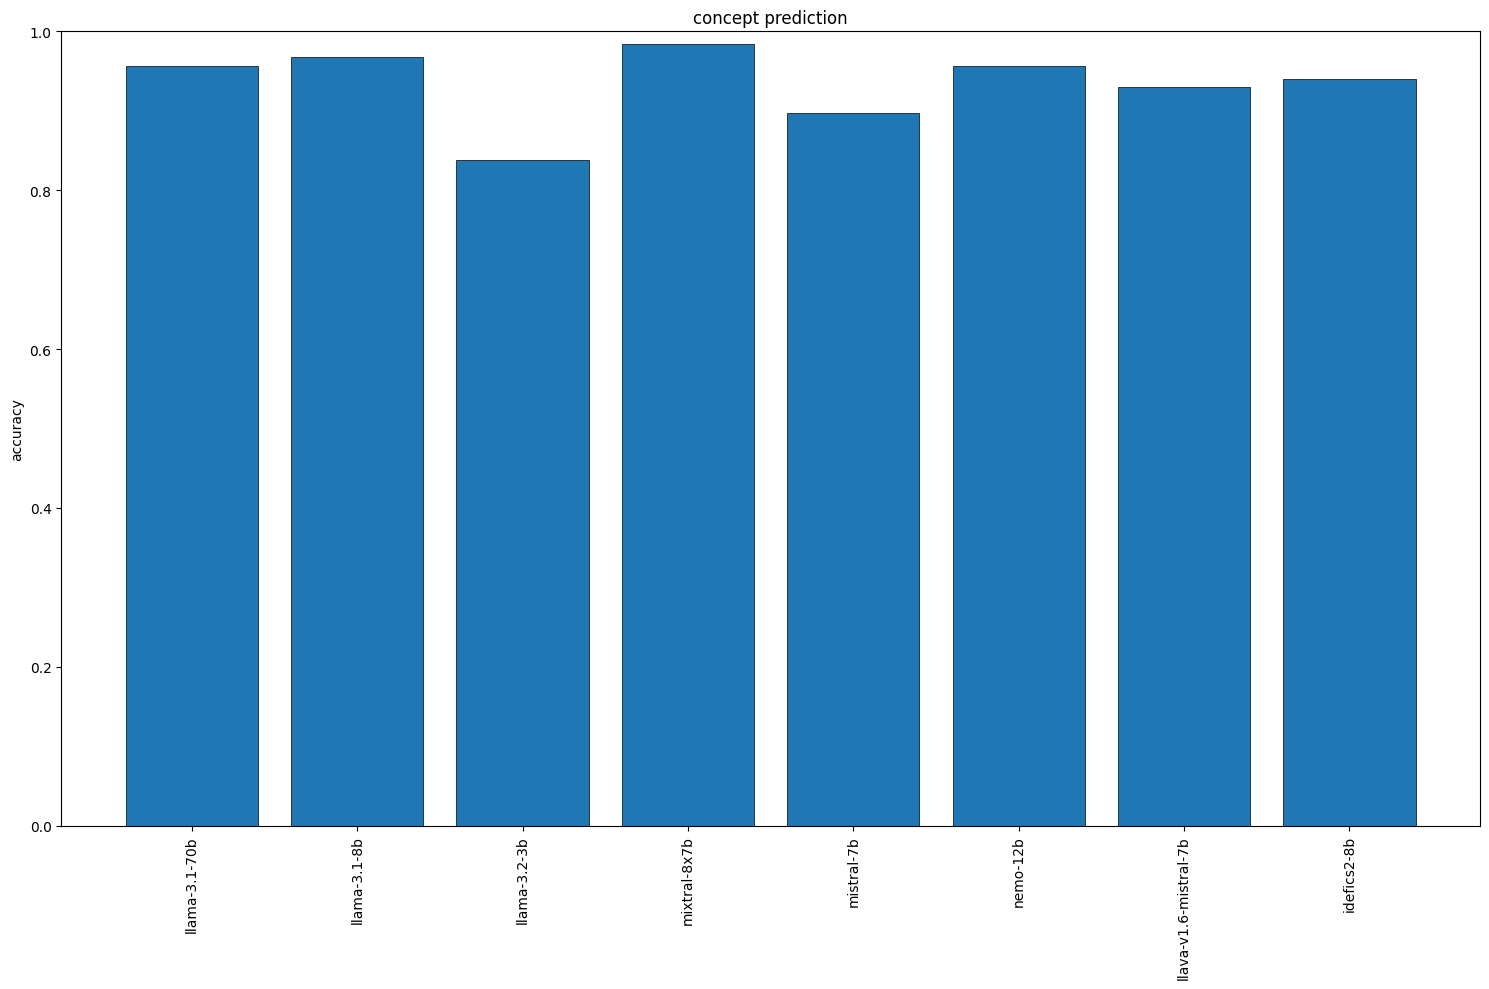

In [22]:
get_barplot(concept_res, title="concept prediction", save=True, show=False)

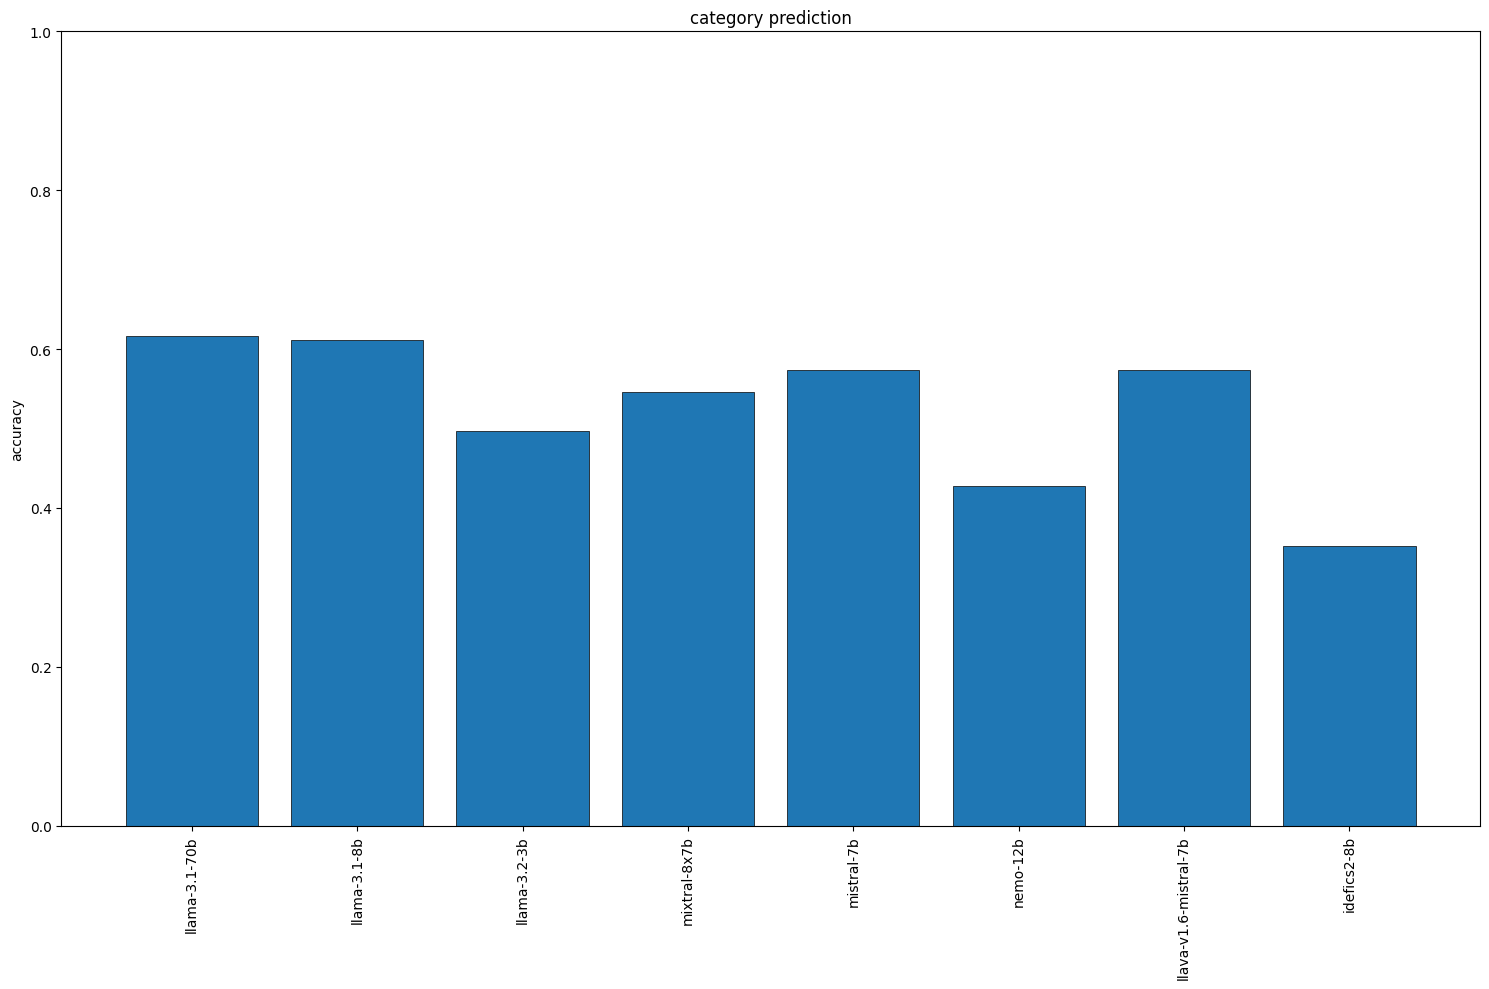

In [23]:
get_barplot(category_res, title="category prediction", save=True, show=False)

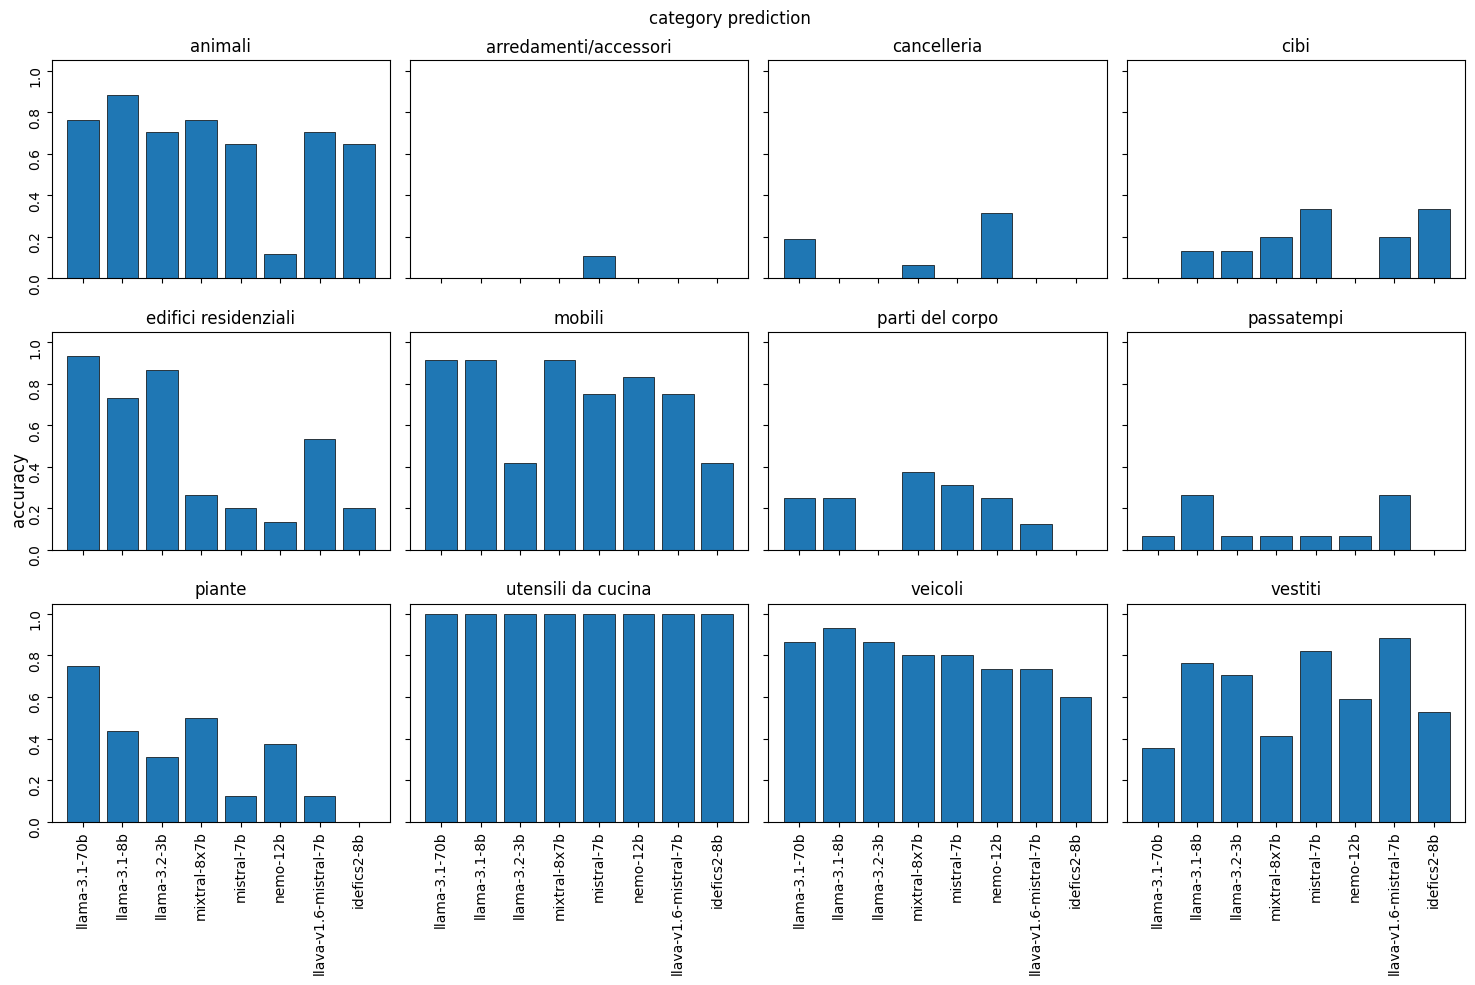

In [136]:
get_barplots(category_pred, models, target="category", title="category prediction", save=True)

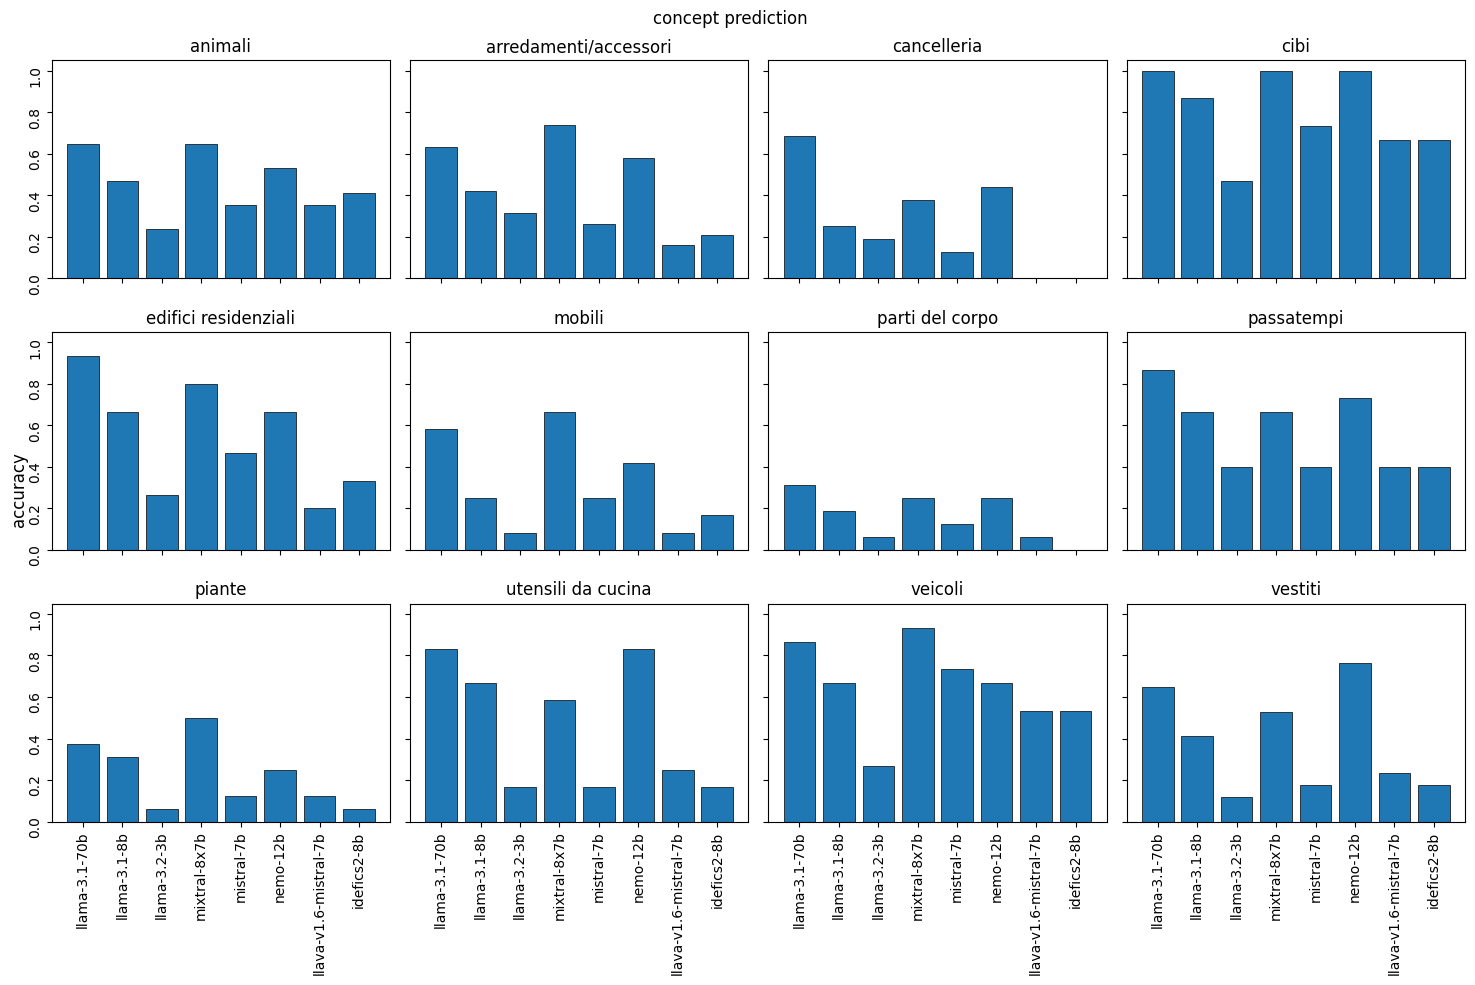

In [137]:
get_barplots(concept_pred, models, target="concept", title="concept prediction", save=True)

# Older

In [2]:
res_name_llama31 = "llama3.1_results.json"
res_name_llama32 = "llama3.2_results.json"
res_name_llava = "llava_results.json"
res_name_mistral = "mistral_results.json"
res_name_mixtral = "mixtral_results.json"
res_name_nemo = "nemo_results.json"
res_name_idefics2 = "idefics2_results.json"
res_name_llama31_70b = "llama3.1-70B_results.json"

llama31_results = json.load(open(res_name_llama31))
llama32_results = json.load(open(res_name_llama32))
llama31_70b_results = json.load(open(res_name_llama31_70b))
nemo_results = json.load(open(res_name_nemo))
mistral_results = json.load(open(res_name_mistral))
mixtral_results = json.load(open(res_name_mixtral))
llava_results = json.load(open(res_name_llava))
idefics2_results = json.load(open(res_name_idefics2))

In [3]:
def overall_acc(data, target="category"):
    overall_acc = 0
    for elem in data:
        if target == "category":
            if elem["gt_cat"] == elem["pred_cat"]:
                overall_acc += 1
        elif target == "concept":
            if elem["gt_concept"] == elem["pred_concept"]:
                overall_acc += 1
    return overall_acc / len(data)

In [4]:
from collections import defaultdict

def specific_acc(data, target="category"):
    specific_acc = defaultdict(list)
    for elem in data:
        if target == "category":
            gt = elem["gt_cat"]
            pred = elem["pred_cat"]
            res = 0 if pred != gt else 1
            specific_acc[gt].append(res)
    
        if target == "concept":
            gt = elem["gt_concept"]
            pred = elem["pred_concept"]
            res = 0 if pred != gt else 1
            specific_acc[gt].append(res)

    for k, v in specific_acc.items():
        specific_acc[k] = sum(v) / len(v)
    return specific_acc

## Category

In [5]:
acc_llama31 = specific_acc(llama31_results)
acc_llama32 = specific_acc(llama32_results)
acc_llama31_70b = specific_acc(llama31_70b_results)
acc_mistral = specific_acc(mistral_results)
acc_mixtral = specific_acc(mixtral_results)
acc_nemo = specific_acc(nemo_results)
acc_llava = specific_acc(llava_results)
acc_idefics2 = specific_acc(idefics2_results)

In [6]:
import pandas as pd

df_res = pd.DataFrame(acc_llama31, index=["llama3.1"])
df_res = pd.concat([df_res, pd.DataFrame(acc_llama32, index=["llama3.2"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_llama31_70b, index=["llama3.1 (70B)"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_mixtral, index=["mixtral"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_mistral, index=["mistral"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_llava, index=["llava"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_nemo, index=["nemo"])])
df_res = pd.concat([df_res, pd.DataFrame(acc_idefics2, index=["idefics2"])])

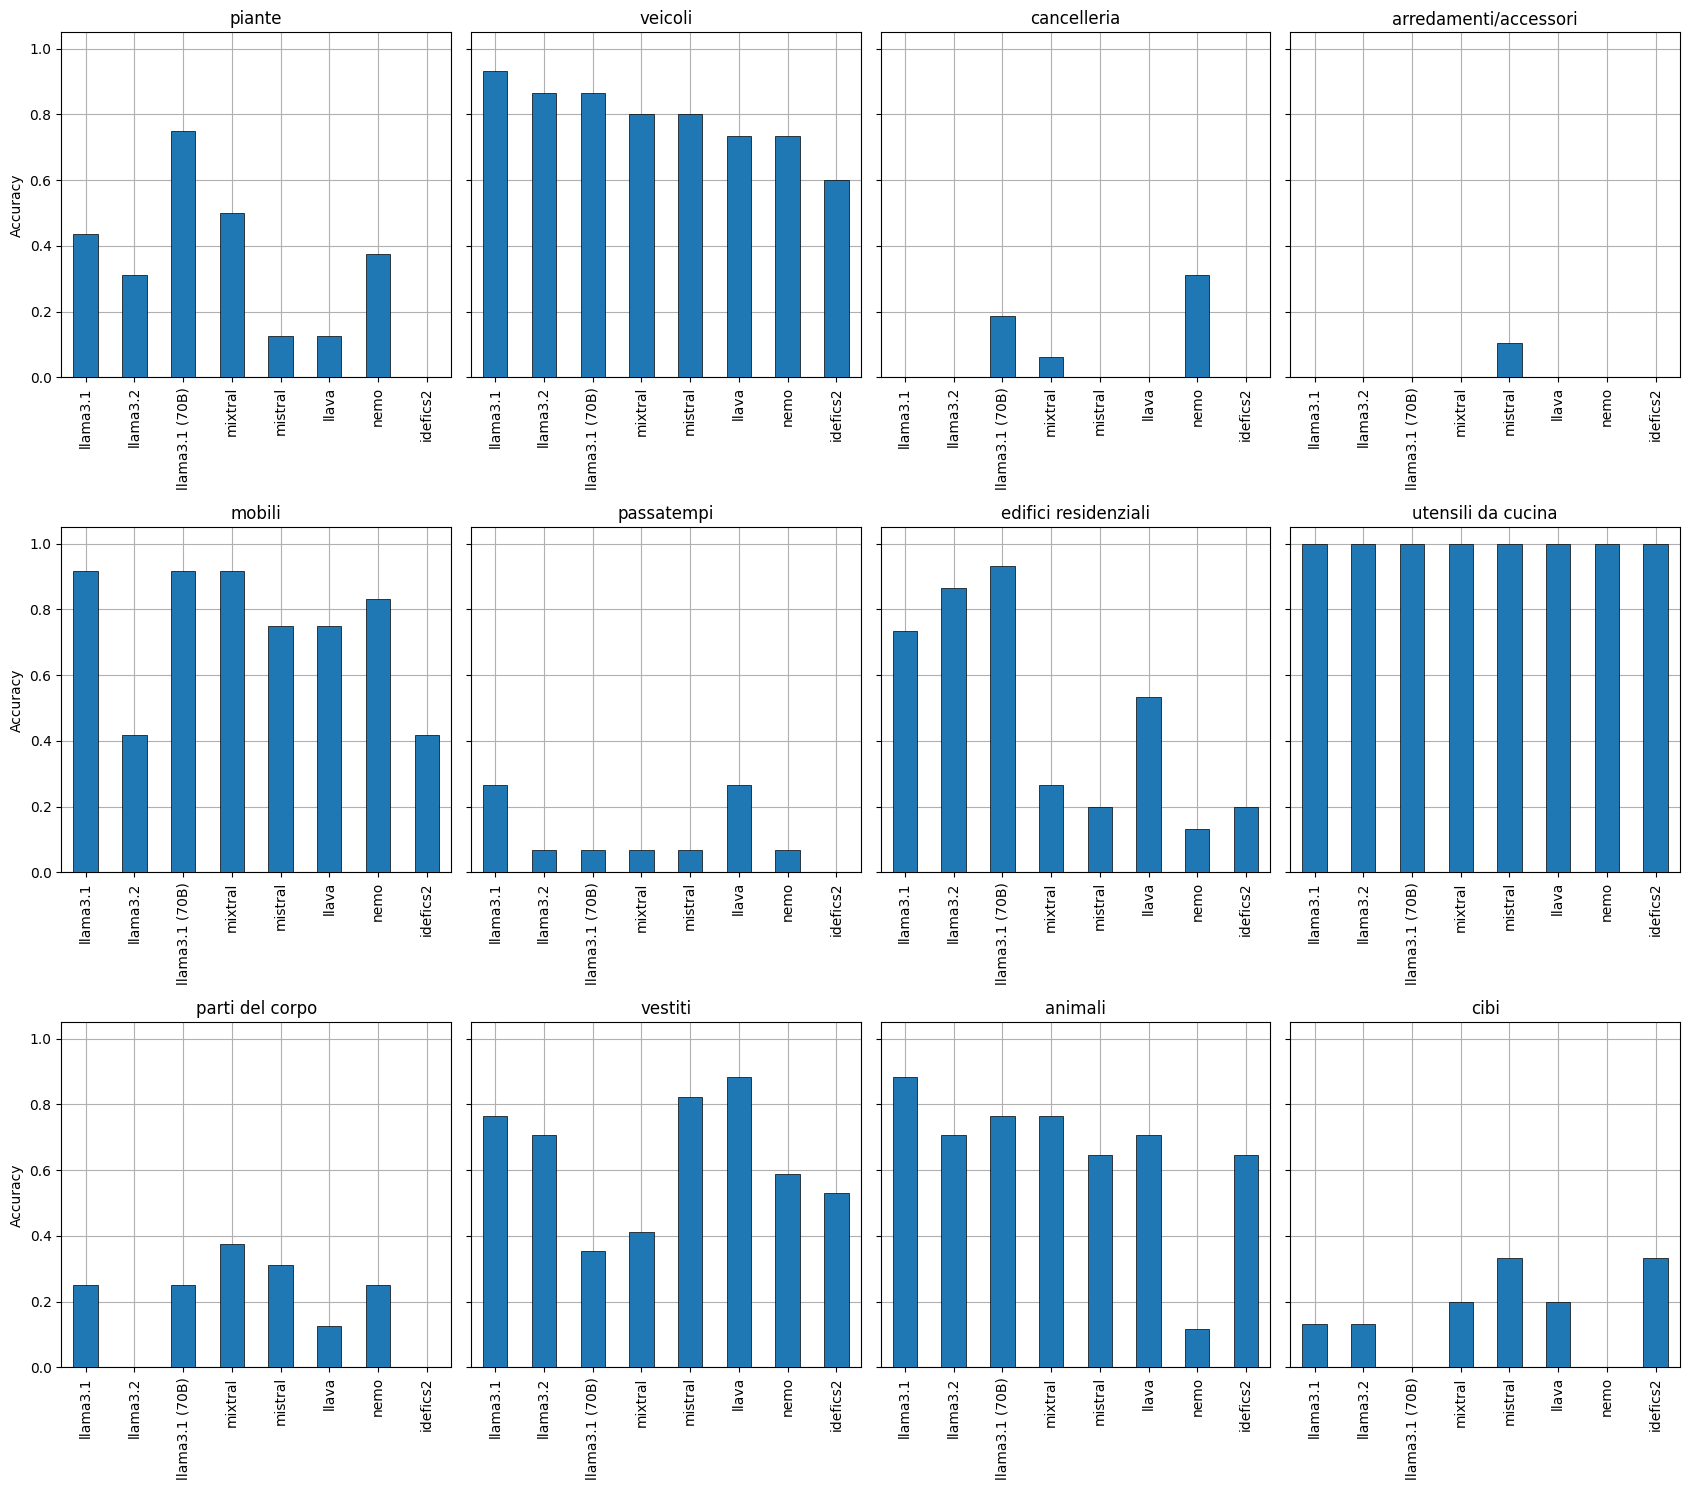

In [7]:
plot_config = {
    "edgecolor": "black",
    "linewidth": 0.5,
    "rot": 90
}

fig, axs = plt.subplots(3, 4, figsize=(17, 15), sharey=True, layout="tight")
axs = axs.ravel()

concepts = sorted(list(acc_llama31.keys()))

for i, concept in enumerate(df_res.columns):
    axs[i].set_title(concept)
    df_res[concept].plot.bar(**plot_config, zorder=3, ax=axs[i])
    axs[i].grid(True, zorder=0)
    axs[i].set_ylabel("Accuracy")

# df_res.piante.plot.bar(**plot_config, zorder=3, ax=axs[0])

fig.show()

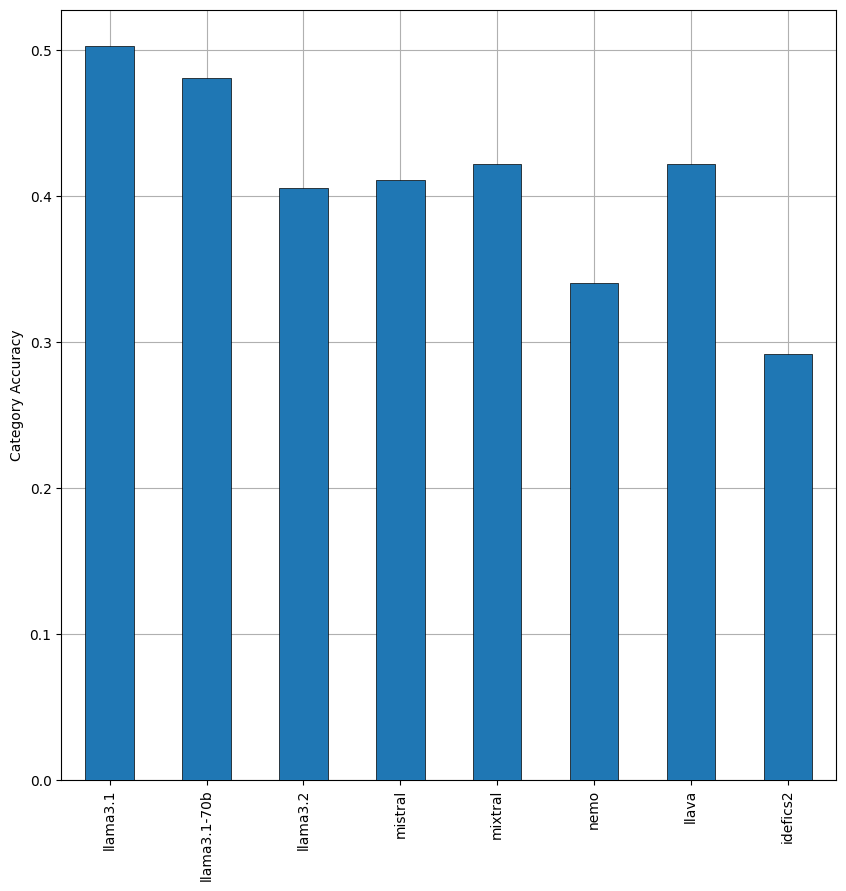

In [17]:
mean_acc_llama31        = overall_acc(llama31_results)
mean_acc_llama32        = overall_acc(llama32_results)
mean_acc_llama31_70b    = overall_acc(llama31_70b_results)
mean_acc_mistral        = overall_acc(mistral_results)
mean_acc_mixtral        = overall_acc(mixtral_results)
mean_acc_nemo           = overall_acc(nemo_results)
mean_acc_llava          = overall_acc(llava_results)
mean_acc_idefics2       = overall_acc(idefics2_results)

mean_results = {
    "llama3.1": mean_acc_llama31,
    "llama3.1-70b": mean_acc_llama31_70b,
    "llama3.2": mean_acc_llama32,
    "mistral": mean_acc_mistral,
    "mixtral": mean_acc_mixtral,
    "nemo": mean_acc_nemo,
    "llava": mean_acc_llava,
    "idefics2": mean_acc_idefics2
}

mean_res_df = pd.DataFrame.from_dict(mean_results, orient="index")

fig, ax = plt.subplots(1, figsize=(10, 10))
mean_res_df.plot.bar(**plot_config, ax=ax, zorder=3, legend=False)

ax.grid(True, zorder=0)
ax.set_ylabel("Category Accuracy")
fig.show()

## Concept

In [11]:
concept_acc_llama31 = specific_acc(llama31_results, target="concept")
concept_acc_llama32 = specific_acc(llama32_results, target="concept")
concept_acc_llama31_70b = specific_acc(llama31_70b_results, target="concept")
concept_acc_mistral = specific_acc(mistral_results, target="concept")
concept_acc_mixtral = specific_acc(mixtral_results, target="concept")
concept_acc_nemo = specific_acc(nemo_results, target="concept")
concept_acc_llava = specific_acc(llava_results, target="concept")
concept_acc_idefics2 = specific_acc(idefics2_results, target="concept")

In [12]:
import pandas as pd

concept_df_res = pd.DataFrame(concept_acc_llama31, index=["llama3.1"])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_llama32, index=["llama3.2"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_llama31_70b, index=["llama3.1 (70B)"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_mixtral, index=["mixtral"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_mistral, index=["mistral"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_llava, index=["llava"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_nemo, index=["nemo"])])
concept_df_res = pd.concat([concept_df_res, pd.DataFrame(concept_acc_idefics2, index=["idefics2"])])

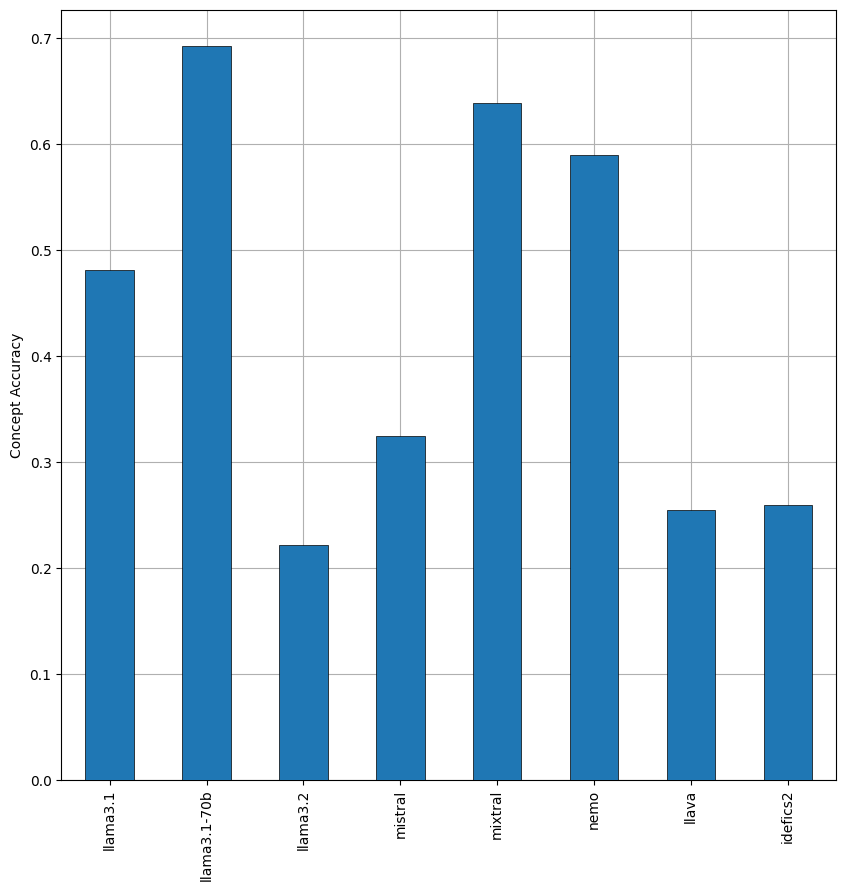

In [16]:
concept_mean_acc_llama31        = overall_acc(llama31_results, target="concept")
concept_mean_acc_llama32        = overall_acc(llama32_results, target="concept")
concept_mean_acc_llama31_70b    = overall_acc(llama31_70b_results, target="concept")
concept_mean_acc_mistral        = overall_acc(mistral_results, target="concept")
concept_mean_acc_mixtral        = overall_acc(mixtral_results, target="concept")
concept_mean_acc_nemo           = overall_acc(nemo_results, target="concept")
concept_mean_acc_llava          = overall_acc(llava_results, target="concept")
concept_mean_acc_idefics2       = overall_acc(idefics2_results, target="concept")

concept_mean_results = {
    "llama3.1":         concept_mean_acc_llama31,
    "llama3.1-70b":     concept_mean_acc_llama31_70b,
    "llama3.2":         concept_mean_acc_llama32,
    "mistral":          concept_mean_acc_mistral,
    "mixtral":          concept_mean_acc_mixtral,
    "nemo":             concept_mean_acc_nemo,
    "llava":            concept_mean_acc_llava,
    "idefics2":         concept_mean_acc_idefics2
}

concept_mean_res_df = pd.DataFrame.from_dict(concept_mean_results, orient="index")

fig, ax = plt.subplots(1, figsize=(10, 10))
concept_mean_res_df.plot.bar(**plot_config, ax=ax, zorder=3, legend=False)

ax.grid(True, zorder=0)
ax.set_ylabel("Concept Accuracy")
fig.show()

/tmp/ipykernel_3970183/3369248064.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(concept_mean_res_df.index, rotation=90)
/tmp/ipykernel_3970183/3369248064.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(concept_mean_res_df.index, rotation=90)


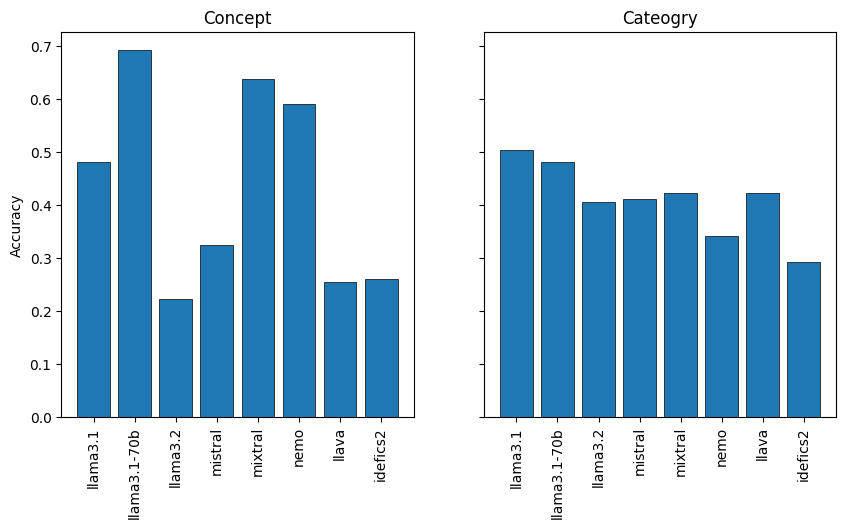

In [47]:
plot_config = {
    "edgecolor": "black",
    "linewidth": 0.5,
}


fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
axs = axs.ravel()

axs[0].bar(x=concept_mean_res_df.index, height=concept_mean_res_df[0], **plot_config)
axs[1].bar(x=mean_res_df.index, height=mean_res_df[0], **plot_config)

axs[0].set_xticklabels(concept_mean_res_df.index, rotation=90)
axs[1].set_xticklabels(concept_mean_res_df.index, rotation=90)

axs[0].set_title("Concept")
axs[1].set_title("Cateogry")

axs[0].set_ylabel("Accuracy")

fig.show()